$$
\begin{align}
\text{Title: Extra Homework, Week 6} \\
\text{Author: Cretu Cristian, 913}
\end{align}
$$

To show that $ f'(x) \approx \frac{f(x + h) - f(x)}{h} $, we will approximate using the Taylor series expansion of $ f(x + h) $ around $ x $:

Def: $$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!}(x - x_0)^n $$
then: $$ f(x + h) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x)}{n!} h^n $$
and for a first order approximation, we will only go until the linear term:
$$ f(x + h) \approx f(x) + h f'(x) $$

The remainder term $R_n(x)$ in Taylor's theorem, which provides the error of this approximation, is:
$$ R_n(x) = \frac{f^{(n+1)}(c)}{(n+1)!}(x - x_0)^{(n+1)} $$

For the first-order approximation, the remainder term is $R_1(x + h) = \frac{f''(c)}{2!} h^2$, where $x < c < x + h $.

And the remainder term $R_1(x + h)$ for the first-order approximation is given by:
$$ R_1(x + h) = f(x + h) - T_1(x + h) = \frac{f''(c)}{2!} h^2 $$

Since $ f(x + h) \approx f(x) + h f'(x) $

Then we have
$$ \frac{f(x + h) - f(x)}{h} = f'(x) + \frac{f''(c)}{2} h $$

Which results that:
$$ f'(x) = \frac{f(x+h) - f(x)}{h} + O(h) $$

For the second-order approximation, we will use the Taylor series expansions of $f(x + h)$ and $f(x - h)$ around $x$:

$$ f(x + h) = f(x) + h f'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(c_1) + \ldots $$
$$ f(x - h) = f(x) - h f'(x) + \frac{h^2}{2!}f''(x) - \frac{h^3}{3!}f'''(c_2) + \ldots $$

where $ c_1 \in (x, x + h)$ and $ c_2 \in (x - h, x)$.

When we subtract the second expansion from the first, the odd-powered terms (like $h f'(x)$ and the cubic term) cancel out =>

$$ f(x + h) - f(x - h) = 2h f'(x) + \frac{h^3}{3!}(f'''(c_1) - f'''(c_2)) $$

Divide both sides with $2h$:

$$ \frac{f(x + h) - f(x - h)}{2h} = f'(x) + \frac{h^2}{6}(f'''(c_1) - f'''(c_2)) $$

The term $\frac{h^2}{6}(f'''(c_1) - f'''(c_2))$ is the error term, which is of order $h^2$ (second order approx.)

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We will take $ f(x) = e^x $, it's derivative is $ f'(x) = e^x :) $

In [34]:
f = lambda x: np.exp(x)
df = lambda x: np.exp(x)

def first_order(x, h):
    return (f(x + h) - f(x)) / h

def second_order(x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

In [12]:
# h values close to 0
h_values = np.logspace(-10, 0, 400)

In [35]:
# Take our point at x0 = 0
x0 = 0

actual_result = df(x0)
actual_result

1.0

In [46]:
first_order_errors = []
second_order_errors = []

for h in h_values:
    first_error = first_order(x0, h) - actual_result
    second_error = second_order(x0, h) - actual_result

    first_order_errors.append(first_error)
    second_order_errors.append(second_error)

max(first_order_errors)

0.7182818284590451

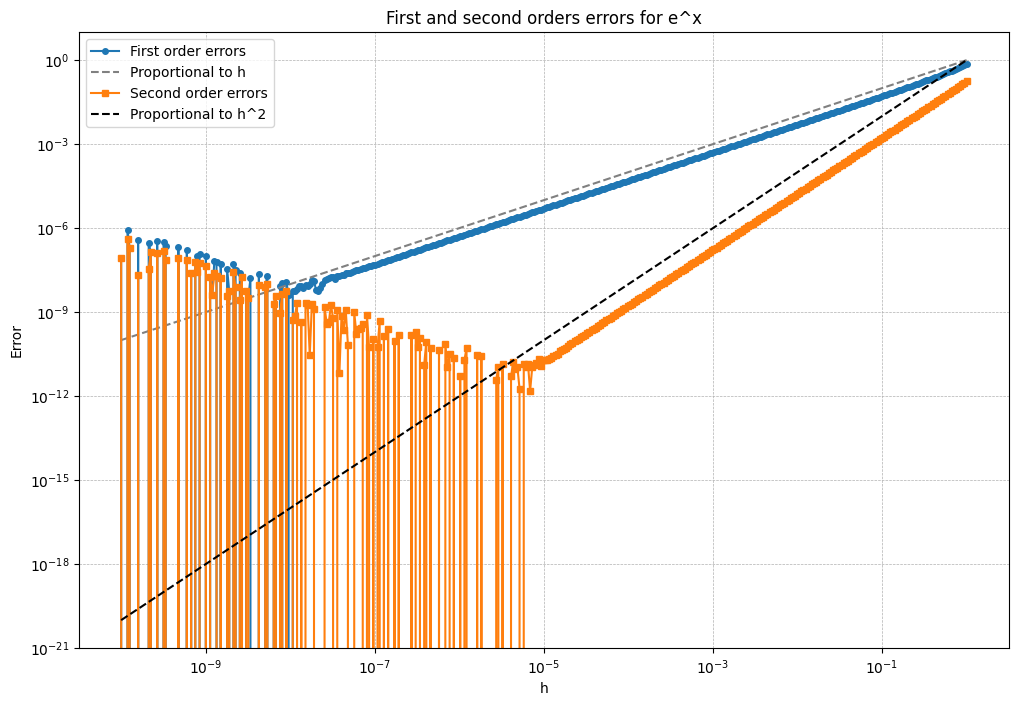

In [47]:
plt.figure(figsize=(12, 8))
plt.loglog(h_values, first_order_errors, label='First order errors', marker='o', linestyle='-', markersize=4)
plt.loglog(h_values, h_values, label='Proportional to h', linestyle='--', color='gray')
plt.loglog(h_values, second_order_errors, label='Second order errors', marker='s', linestyle='-', markersize=4)
plt.loglog(h_values, h_values**2, label='Proportional to h^2', linestyle='--', color='black')

# annotations
plt.xlabel('h')
plt.ylabel('Error')
plt.title('First and second orders errors for e^x')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()